In [1]:

import pandas as pd
import numpy as np




<h2 id="DADOS-AUSENTES:">DADOS AUSENTES:<a class="anchor-link" href="#DADOS-AUSENTES:">¶</a></h2>



<p>Nessa seção vamos aprender como lidar com tabelas incompletas. Por padrão o pandas reconhece apenas alguns caracteres como valores ausentes (que seria 'NA', 'NaN' ou simplesmente um vazio).</p>
<p>Mas as vezes um processo pode marcar um valor ausente com algum caracter específico e o pandas consegue trabalhar muito bem nessas situações bastante apenas utilizar a option 'na_values' da ação de leitura '.read_csv()' como no exemplo abaixo:</p>


In [2]:

data = pd.read_csv('/Users/julianaforlin/Downloads/vehicles/vehicles_messy.csv',low_memory=False)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
barrels08          37843 non-null float64
barrelsA08         37843 non-null float64
charge120          37843 non-null float64
charge240          37843 non-null float64
city08             37843 non-null int64
city08U            37843 non-null float64
cityA08            37843 non-null int64
cityA08U           37843 non-null float64
cityCD             37843 non-null float64
cityE              37843 non-null float64
cityUF             37843 non-null float64
co2                37843 non-null int64
co2A               37843 non-null int64
co2TailpipeAGpm    37843 non-null float64
co2TailpipeGpm     37843 non-null float64
comb08             37843 non-null int64
comb08U            37843 non-null float64
combA08            37843 non-null int64
combA08U           37843 non-null float64
combE              37843 non-null float64
combinedCD         37843 non-null float64
combinedUF         37


<p>Se ainda assim existir alguma coluna que tenha algum caso bem específico como, por exemplo, uma determinada variável só pode ter letras mas por algum motivo veio um número inteiro no meio. Pode realizar o seguinte comando:</p>


In [3]:

# Detectando se há algum inteiro e transformando em missing através da função do Numpy np.nan 
cnt=0
for row in data['mfrCode']:
    try:
        int(row)
        data.loc[cnt, 'mfrCode']=np.nan
    except ValueError:
        pass
    cnt+=1




<p>o comando try e except funcionam da seguinte maneira:
o try tentará rodar algum bloco de comando, caso aconteça algum erro, ele roda o bloco de comando do except</p>
<p>nesse caso, estou olhando uma variável que tem apenas letras e estou vendo se algum elemento dela eu consigo transformar em inteiro (o que nesse caso será transformado em NaN). Caso ele não consiga transformar em inteiro, será retornado um erro e o processo seguirá para o except, aonde o comando irá continuar o processo do for normalmente, sem parar por causa do erro,</p>



<p>Perceba que algumas células do nosso dataframe contém <b>NaN</b>, que significa <i>not a number</i>, o que é apenas uma forma
de dizer que a não se tem aquela informação, o dado está ausente.</p>
<p>A função <i>isnull()</i> retorna um df de variáveis booleanas indicando se a informação está ausente</p>


In [4]:

data.isnull().head()



barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      False       False      False      False   False    False    False   
1      False       False      False      False   False    False    False   
2      False       False      False      False   False    False    False   
3      False       False      False      False   False    False    False   
4      False       False      False      False   False    False    False   

   cityA08U  cityCD  cityE    ...     mfrCode  c240Dscr  charge240b  \
0     False   False  False    ...        True      True       False   
1     False   False  False    ...        True      True       False   
2     False   False  False    ...        True      True       False   
3     False   False  False    ...        True      True       False   
4     False   False  False    ...        True      True       False   

   c240bDscr  createdOn  modifiedOn  startStop  phevCity  phevHwy  phevComb  
0       True      False       False       True     False    False     False  
1       True      False       False       True     False    False     False  
2       True      False       False       True     False    False     False  
3       True      False       False       True     False    False     False  
4       True      False       False       True     False    False     False  

[5 rows x 83 columns]

In [5]:

# Para saber a quantidade de células com Nan em cada uma das colunas, podemos fazer:
data.isnull().sum()

# Para verificar quantas colunas possuem pelo menos um elemento NaN
len(data.loc[:,data.isnull().sum() > 0].columns)

# Para saber a quantidade de células com NaN apenas nas colunas com NaN:
data.loc[:,data.isnull().sum() > 0].isnull().sum()

# esta primeira parte df.loc[:,df.isnull().sum() > 0] está filtrando a base,
# selecionando todas as linhas (com o comando : no primeiro espaço entre os colchetes) das colunas com pelo menos um NaN
# A segunda parte .isnull().sum() realiza a contagem de quantos NaN tem



cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [6]:

# Para saber a porcentagem de células com Nan em cada uma das colunas, podemos fazer:
data.isnull().sum()/data.shape[0]

# Para verificar quantas colunas possuem pelo menos 80% dos valores como um elemento NaN
len(data.loc[:,data.isnull().sum()/data.shape[0] > 0.8].columns)

# Para saber a quantidade de células com NaN apenas nas colunas com pelo menos 80% de NaN:
data.loc[:,data.isnull().sum()/data.shape[0] > 0.8].isnull().sum()



guzzler      35562
tCharger     32657
sCharger     37177
atvType      34771
fuelType2    36435
rangeA       36440
evMotor      37281
mfrCode      30818
c240Dscr     37806
c240bDscr    37807
startStop    31705
dtype: int64

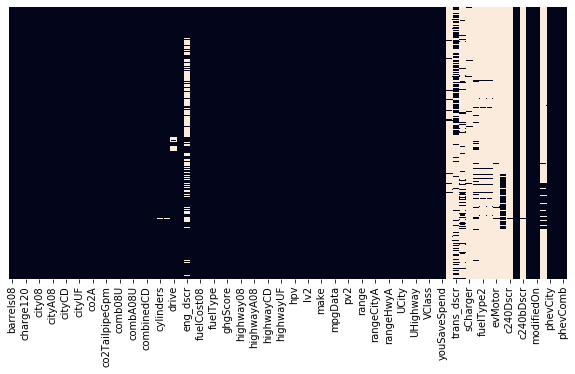

In [7]:

# Só para facilitar a visualização dos dados ausentes - para saber mais leia o tutorial 'Seaborn'
# Em preto, os dados ausentes

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)




<p>E agora? Temos algumas colunas com falta de informações. 
O que fazer? Como resolver esse problema?</p>
<p>Não existe uma maneira correta ou única para resolver isso, vai depender de cada caso. Algumas opções são:</p>
<p>a) Apagar a coluna;    b) Apagar a linha;   c) Preencher com algum valor</p>


In [8]:

# Vamos resolver o problema da guzzler. Nessa coluna temos 35562 valores nulos. Vimos que nosso dataframe tem 37843 linhas,
# ou seja, aqui não dá pra fazer muita coisa, melhor apagar toda coluna:
data['guzzler2'] = data['guzzler']
data.drop('guzzler2', axis=1, inplace = True) # axis é o eixo: 0 p linha e 1 p coluna
                                         # lembre sempre do inplace = True, para que a mudança seja permanente no nosso df



In [9]:

# Mas ainda temos muito missings, podemos remover direto as colunas com mais de 10000 valores missings
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

drop_cols = list(null_cols[null_cols > 10000].index)
data = data.drop(drop_cols, axis=1)



In [10]:

# Agora vamos para a coluna de 'cylinders', uma opção aqui seria preencher os valores ausentes com a média dela

data['cylinders'].mean()



5.7379904559915165

In [11]:

# Uma solução mais elegante e mais correta seria pegar a média de cada classe de 'Model' para preencher os
# valores, posso fazer isso com o groupby
pd.options.display.float_format = '{:.2f}'.format
data.groupby('VClass')['cylinders'].mean()



VClass
Compact Cars                         4.82
Large Cars                           7.13
Midsize Cars                         5.68
Midsize Station Wagons               5.12
Midsize-Large Station Wagons         5.18
Minicompact Cars                     5.76
Minivan - 2WD                        5.80
Minivan - 4WD                        6.00
Small Pickup Trucks                  4.63
Small Pickup Trucks 2WD              4.76
Small Pickup Trucks 4WD              5.17
Small Sport Utility Vehicle 2WD      4.66
Small Sport Utility Vehicle 4WD      4.87
Small Station Wagons                 4.42
Special Purpose Vehicle              4.00
Special Purpose Vehicle 2WD          5.56
Special Purpose Vehicle 4WD          5.92
Special Purpose Vehicles             5.75
Special Purpose Vehicles/2wd         5.00
Special Purpose Vehicles/4wd         6.00
Sport Utility Vehicle - 2WD          5.87
Sport Utility Vehicle - 4WD          6.23
Standard Pickup Trucks               6.78
Standard Pickup Trucks 2WD 

In [12]:

# Agora é só criar uma função para preencher os valores que faltam com as médias calculadas:

def preenchedor(cols):   # a função será aplicada em uma lista de colunas
    cylinders = cols[0]     # sendo que a primeira é a da cylinders, index =[0]
    VClass       = cols[1]     # e a segunda é a da RAT_BACEN, index = [1]
    
    if pd.isnull(cylinders):     # se o valor na coluna cylinders for NaN
        if VClass   == 'Compact Cars':      # e se pertencer a classe "Compact Cars" de VClass
            return 4.82        # retorna a média de cylinders da classe "Compact Cars"  = 4.82
        elif VClass == 'Large Cars':
            return 7.13
        elif VClass == 'Midsize Cars':
            return 5.68  
        elif VClass == 'Midsize Station Wagons':
            return 5.12  
        elif VClass == 'Midsize-Large Station Wagons':
            return 5.18
        elif VClass == 'Minicompact Cars':
            return 5.76
        elif VClass == 'Minivan - 2WD':
            return 5.80 
        else:
            return 0            
    else:                                  # mas se o valor de cylinders não for Nan  
        return cylinders             # recebe o próprio valor
    





In [13]:

# Aplicando a função para modificar a coluna Age

data['cylinders_2'] = data[['cylinders','VClass']].apply(preenchedor, axis=1)
print("Variável original:  ", data['cylinders'].isnull().sum())
print("VAriável modificada:", data['cylinders_2'].isnull().sum())



Variável original:   123
VAriável modificada: 0


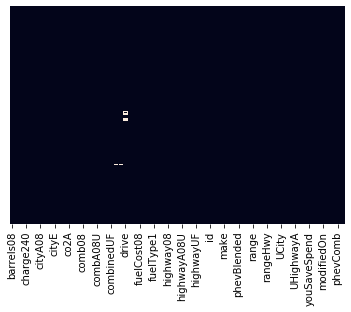

In [14]:

sns.heatmap(data.isnull(), cbar=False, yticklabels=False)



<h2 id="Baixa variância:-"><u>Baixa Variância: </u><a class="anchor-link" href="#Baixa Variância:-">¶</a></h2>

In [15]:
low_variance = []

for col in data._get_numeric_data():
    minimum = min(data[col])
    ninety_perc = np.percentile(data[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

['barrelsA08', 'charge120', 'charge240', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2A', 'co2TailpipeAGpm', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'fuelCostA08', 'ghgScoreA', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'phevBlended', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'UCityA', 'UHighwayA', 'charge240b', 'phevCity', 'phevHwy', 'phevComb']


In [16]:
data = data.drop(low_variance, axis=1)



In [52]:
data.head()

barrels08  city08  city08U  co2  co2TailpipeGpm  comb08  comb08U  \
0      15.70      19     0.00   -1          423.19      21     0.00   
1      29.96       9     0.00   -1          807.91      11     0.00   
2      12.21      23     0.00   -1          329.15      27     0.00   
3      29.96      10     0.00   -1          807.91      11     0.00   
4      17.35      17     0.00   -1          467.74      19     0.00   

   cylinders  displ                       drive     ...       pv4  \
0       4.00   2.00            Rear-Wheel Drive     ...         0   
1      12.00   4.90            Rear-Wheel Drive     ...         0   
2       4.00   2.20           Front-Wheel Drive     ...         0   
3       8.00   5.20            Rear-Wheel Drive     ...         0   
4       4.00   2.20  4-Wheel or All-Wheel Drive     ...        90   

             trany  UCity UHighway           VClass  year  youSaveSpend  \
0     Manual 5-spd  23.33    35.00      Two Seaters  1985         -1250   
1     Manual 5-spd  11.00    19.00      Two Seaters  1985         -8500   
2     Manual 5-spd  29.00    47.00  Subcompact Cars  1985           500   
3  Automatic 3-spd  12.22    16.67             Vans  1985         -8500   
4     Manual 5-spd  21.00    32.00     Compact Cars  1993         -4000   

                      createdOn                    modifiedOn  cylinders_2  
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013         8.00  
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        24.00  
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013         8.00  
3  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        16.00  
4  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013         8.00  

[5 rows x 37 columns]

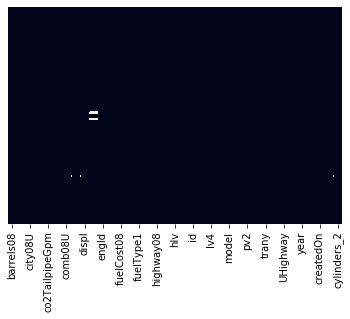

In [51]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)


<h2 id="Outliers:-"><u>Outliers: </u><a class="anchor-link" href="#Outliers:-">¶</a></h2>

In [89]:
stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats['lower_bound'] = stats['25%'] -(1.5 * stats['IQR']) 
stats['upper_bound'] = stats['75%'] +(1.5 * stats['IQR']) 
stats

count     mean      std       min      25%      50%  \
barrels08      37843.00    17.53     4.58      0.06    14.33    17.35   
city08         37843.00    17.94     6.66      6.00    15.00    17.00   
city08U        37843.00     4.04     9.65      0.00     0.00     0.00   
co2            37843.00    61.50   153.39     -1.00    -1.00    -1.00   
co2TailpipeGpm 37843.00   473.18   122.19      0.00   388.00   467.74   
comb08         37843.00    20.20     6.62      7.00    17.00    19.00   
comb08U        37843.00     4.55    10.39      0.00     0.00     0.00   
cylinders      37720.00     5.74     1.75      2.00     4.00     6.00   
displ          37723.00     3.32     1.36      0.00     2.20     3.00   
engId          37843.00  8860.31 17829.68      0.00     0.00   211.00   
feScore        37843.00    -0.04     2.38     -1.00    -1.00    -1.00   
fuelCost08     37843.00  1882.06   510.28    550.00  1500.00  1850.00   
ghgScore       37843.00    -0.04     2.37     -1.00    -1.00    -1.00   
highway08      37843.00    24.10     6.96      9.00    20.00    24.00   
highway08U     37843.00     5.44    11.94      0.00     0.00     0.00   
hlv            37843.00     2.03     5.95      0.00     0.00     0.00   
hpv            37843.00    10.42    28.15      0.00     0.00     0.00   
id             37843.00 19019.29 11034.78      1.00  9461.50 18923.00   
lv2            37843.00     1.85     4.43      0.00     0.00     0.00   
lv4            37843.00     6.17     9.74      0.00     0.00     0.00   
pv2            37843.00    13.70    31.27      0.00     0.00     0.00   
pv4            37843.00    33.77    45.91      0.00     0.00     0.00   
UCity          37843.00    22.59     9.35      0.00    18.00    21.00   
UHighway       37843.00    33.62    10.05      0.00    27.10    33.00   
year           37843.00  2000.06    10.39   1984.00  1990.00  2001.00   
youSaveSpend   37843.00 -2659.00  2553.10 -22250.00 -4250.00 -2500.00   
cylinders_2    37720.00    11.48     3.50      4.00     8.00    12.00   

                    75%      max      IQR  lower_bound  upper_bound  
barrels08         20.60    47.09     6.27         4.93        30.01  
city08            20.00   138.00     5.00         7.50        27.50  
city08U            0.00   138.30     0.00         0.00         0.00  
co2               -1.00   847.00     0.00        -1.00        -1.00  
co2TailpipeGpm   555.44  1269.57   167.44       136.84       806.59  
comb08            23.00   124.00     6.00         8.00        32.00  
comb08U            0.00   124.36     0.00         0.00         0.00  
cylinders          6.00    16.00     2.00         1.00         9.00  
displ              4.30     8.40     2.10        -0.95         7.45  
engId           4505.00 69102.00  4505.00     -6757.50     11262.50  
feScore           -1.00    10.00     0.00        -1.00        -1.00  
fuelCost08      2200.00  5800.00   700.00       450.00      3250.00  
ghgScore          -1.00    10.00     0.00        -1.00        -1.00  
highway08         27.00   111.00     7.00         9.50        37.50  
highway08U         0.00   111.37     0.00         0.00         0.00  
hlv                0.00    49.00     0.00         0.00         0.00  
hpv                0.00   195.00     0.00         0.00         0.00  
id             28570.50 38173.00 19109.00    -19202.00     57234.00  
lv2                0.00    41.00     0.00         0.00         0.00  
lv4               13.00    55.00    13.00       -19.50        32.50  
pv2                0.00   194.00     0.00         0.00         0.00  
pv4               91.00   192.00    91.00      -136.50       227.50  
UCity             25.14   197.58     7.14         7.29        35.85  
UHighway          38.11   159.10    11.01        10.59        54.62  
year            2009.00  2017.00    19.00      1961.50      2037.50  
youSaveSpend    -750.00  4000.00  3500.00     -9500.00      4500.00  
cylinders_2       12.00    32.00     4.00         2.00        18.00


<h1 id="JUNTAR-DATAFRAMES">JUNTAR DATAFRAMES<a class="anchor-link" href="#JUNTAR-DATAFRAMES">¶</a></h1>



<p>As três principais funções para unir dataframes são: <i>  .concat(), .join() e .merge()</i><br/>
Vamos ver as diferenças entre elas e quando usar cada uma.</p>


In [20]:

# Temos 2 dataframes df1 e df2

df1 = pd.DataFrame(columns= 'A B C'.split(), index= [0,1,2], data=[['a1','b1','c1'],
                                                                   ['a2', 'b2', 'c2'], 
                                                                   ['a3', 'b3', 'c3']])
df2 = pd.DataFrame(columns= 'A B C'.split(), index= [3,4,5], data=[['a3','b3','c3'],
                                                                   ['a4', 'b4', 'c4'], 
                                                                   ['a5', 'b5', 'c5']])

df3 = pd.DataFrame(columns= 'D E F'.split(), index= [0, 1, 2], data=[['d1','e1','f1'],
                                                                   ['d2', 'e2', 'f2'], 
                                                                   ['d3', 'e3', 'f3']])



In [21]:

df1



A   B   C
0  a1  b1  c1
1  a2  b2  c2
2  a3  b3  c3

In [22]:

df2



A   B   C
3  a3  b3  c3
4  a4  b4  c4
5  a5  b5  c5


<p><b> CONCAT ( ) : </b>  basicamente cola dois ou mais dataframes juntos</p>


In [23]:

# A primeira função que veremos é a 'concat'. Ela basicamente junta dois dataframes.

pd.concat([df1, df2])  # passamos uma lista com os df a serem concatenados



A   B   C
0  a1  b1  c1
1  a2  b2  c2
2  a3  b3  c3
3  a3  b3  c3
4  a4  b4  c4
5  a5  b5  c5

In [24]:

# Para juntar pelo eixo das colunas, use 'axis=1'. No nosso caso, resultou em alguns valores NaN, pois os df originais
# não possuem a informação das respectivas células

pd.concat([df1, df2], axis=1)



A    B    C    A    B    C
0   a1   b1   c1  NaN  NaN  NaN
1   a2   b2   c2  NaN  NaN  NaN
2   a3   b3   c3  NaN  NaN  NaN
3  NaN  NaN  NaN   a3   b3   c3
4  NaN  NaN  NaN   a4   b4   c4
5  NaN  NaN  NaN   a5   b5   c5

In [25]:

# Um bom uso para o 'axis=1' seria na concatenação do df1 com o df3, pois compartilham o mesmo índice com colunas diferentes

pd.concat([df1, df3], axis=1)



A   B   C   D   E   F
0  a1  b1  c1  d1  e1  f1
1  a2  b2  c2  d2  e2  f2
2  a3  b3  c3  d3  e3  f3


<p><b> JOIN( ): </b> faz a união de dataframes no índice ou em alguma coluna (transformado em índice)</p>


In [26]:
data.head()



barrels08  city08  city08U  co2  co2TailpipeGpm  comb08  comb08U  \
0      15.70      19     0.00   -1          423.19      21     0.00   
1      29.96       9     0.00   -1          807.91      11     0.00   
2      12.21      23     0.00   -1          329.15      27     0.00   
3      29.96      10     0.00   -1          807.91      11     0.00   
4      17.35      17     0.00   -1          467.74      19     0.00   

   cylinders  displ                       drive     ...       pv4  \
0       4.00   2.00            Rear-Wheel Drive     ...         0   
1      12.00   4.90            Rear-Wheel Drive     ...         0   
2       4.00   2.20           Front-Wheel Drive     ...         0   
3       8.00   5.20            Rear-Wheel Drive     ...         0   
4       4.00   2.20  4-Wheel or All-Wheel Drive     ...        90   

             trany  UCity UHighway           VClass  year  youSaveSpend  \
0     Manual 5-spd  23.33    35.00      Two Seaters  1985         -1250   
1     Manual 5-spd  11.00    19.00      Two Seaters  1985         -8500   
2     Manual 5-spd  29.00    47.00  Subcompact Cars  1985           500   
3  Automatic 3-spd  12.22    16.67             Vans  1985         -8500   
4     Manual 5-spd  21.00    32.00     Compact Cars  1993         -4000   

                      createdOn                    modifiedOn  cylinders_2  
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013         4.00  
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        12.00  
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013         4.00  
3  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013         8.00  
4  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013         4.00  

[5 rows x 37 columns]

In [27]:

# Suponha que você tenha 2 df com informações sobre alguns clientes

func1 = data.loc[1:1000, ['cylinders','drive']]
func2 = data.loc[1:2000, ['trany'      ,'UCity']]




In [28]:

func1   # func1 tem dados dos clientes sobre o Cylinders e Drive



cylinders                       drive
1         12.00            Rear-Wheel Drive
2          4.00           Front-Wheel Drive
3          8.00            Rear-Wheel Drive
4          4.00  4-Wheel or All-Wheel Drive
5          4.00           Front-Wheel Drive
6          4.00           Front-Wheel Drive
7          4.00           Front-Wheel Drive
8          4.00           Front-Wheel Drive
9          4.00           Front-Wheel Drive
10         4.00           Front-Wheel Drive
11         4.00           Front-Wheel Drive
12         4.00           Front-Wheel Drive
13         4.00           Front-Wheel Drive
14         8.00            Rear-Wheel Drive
15         4.00           Front-Wheel Drive
16         4.00            Rear-Wheel Drive
17         4.00            Rear-Wheel Drive
18         6.00           Front-Wheel Drive
19         6.00           Front-Wheel Drive
20         8.00            Rear-Wheel Drive
21         8.00            Rear-Wheel Drive
22        12.00            Rear-Wheel Drive
23         4.00           Front-Wheel Drive
24         6.00           Front-Wheel Drive
25         8.00            Rear-Wheel Drive
26         6.00           Front-Wheel Drive
27         6.00           Front-Wheel Drive
28         6.00           Front-Wheel Drive
29         6.00           Front-Wheel Drive
30         6.00           Front-Wheel Drive
...         ...                         ...
971        6.00           Front-Wheel Drive
972        6.00           Front-Wheel Drive
973        6.00           Front-Wheel Drive
974        4.00           Front-Wheel Drive
975        6.00           Front-Wheel Drive
976        6.00           Front-Wheel Drive
977        4.00           Front-Wheel Drive
978        6.00           Front-Wheel Drive
979        6.00  4-Wheel or All-Wheel Drive
980        6.00           Front-Wheel Drive
981        4.00           Front-Wheel Drive
982        4.00           Front-Wheel Drive
983        4.00           Front-Wheel Drive
984        4.00           Front-Wheel Drive
985        4.00           Front-Wheel Drive
986        4.00           Front-Wheel Drive
987        6.00           Front-Wheel Drive
988        6.00           Front-Wheel Drive
989        4.00           Front-Wheel Drive
990        6.00  4-Wheel or All-Wheel Drive
991        4.00           Front-Wheel Drive
992        4.00           Front-Wheel Drive
993        4.00           Front-Wheel Drive
994        4.00           Front-Wheel Drive
995        4.00           Front-Wheel Drive
996        6.00           Front-Wheel Drive
997        6.00           Front-Wheel Drive
998        4.00           Front-Wheel Drive
999        4.00           Front-Wheel Drive
1000       4.00           Front-Wheel Drive

[1000 rows x 2 columns]

In [29]:

func2  # func2 tem dados sobre o trany e UCity



trany  UCity
1        Manual 5-spd  11.00
2        Manual 5-spd  29.00
3     Automatic 3-spd  12.22
4        Manual 5-spd  21.00
5     Automatic 3-spd  27.00
6        Manual 5-spd  28.00
7     Automatic 3-spd  29.00
8        Manual 5-spd  30.00
9     Automatic 4-spd  29.00
10       Manual 5-spd  30.00
11    Automatic 4-spd  23.00
12       Manual 5-spd  27.00
13    Automatic 4-spd  23.00
14    Automatic 3-spd  14.44
15       Manual 5-spd  25.00
16    Automatic 4-spd  22.00
17       Manual 5-spd  23.33
18    Automatic 4-spd  21.00
19       Manual 5-spd  21.00
20    Automatic 5-spd  17.78
21    Automatic 5-spd  17.00
22    Automatic 4-spd  13.33
23    Automatic 3-spd  26.00
24    Automatic 3-spd  21.11
25       Manual 4-spd  14.00
26    Automatic 4-spd  22.00
27    Automatic 3-spd  21.00
28    Automatic 4-spd  21.00
29    Automatic 4-spd  21.00
30    Automatic 4-spd  21.00
...               ...    ...
1971     Manual 5-spd  15.56
1972  Automatic 3-spd  39.00
1973     Manual 5-spd  49.00
1974  Automatic 4-spd  30.00
1975     Manual 5-spd  31.00
1976  Automatic 4-spd  25.00
1977     Manual 5-spd  24.44
1978  Automatic 3-spd  34.44
1979  Automatic 3-spd   9.00
1980  Automatic 4-spd  33.33
1981     Manual 4-spd  37.00
1982     Manual 5-spd  34.44
1983  Automatic 4-spd  24.00
1984     Manual 5-spd  26.67
1985  Automatic 4-spd  20.00
1986  Automatic 4-spd  21.00
1987     Manual 5-spd  20.00
1988     Manual 6-spd  20.00
1989  Automatic 4-spd  22.00
1990  Automatic 3-spd   9.00
1991  Automatic 4-spd  17.00
1992     Manual 5-spd  19.00
1993  Automatic 4-spd  21.00
1994     Manual 5-spd  21.00
1995  Automatic 4-spd  20.00
1996     Manual 5-spd  20.00
1997     Manual 5-spd  20.00
1998  Automatic 4-spd  20.00
1999  Automatic 4-spd  21.00
2000     Manual 5-spd  21.11

[2000 rows x 2 columns]

In [30]:

# O parâmetro 'how' é a forma de união, são quatro opções: left, right, inner, outer 

func1.join(func2)   # left é o padrão: vai usar o índice do df da esquerda, no nosso caso func1



cylinders                       drive            trany  UCity
1         12.00            Rear-Wheel Drive     Manual 5-spd  11.00
2          4.00           Front-Wheel Drive     Manual 5-spd  29.00
3          8.00            Rear-Wheel Drive  Automatic 3-spd  12.22
4          4.00  4-Wheel or All-Wheel Drive     Manual 5-spd  21.00
5          4.00           Front-Wheel Drive  Automatic 3-spd  27.00
6          4.00           Front-Wheel Drive     Manual 5-spd  28.00
7          4.00           Front-Wheel Drive  Automatic 3-spd  29.00
8          4.00           Front-Wheel Drive     Manual 5-spd  30.00
9          4.00           Front-Wheel Drive  Automatic 4-spd  29.00
10         4.00           Front-Wheel Drive     Manual 5-spd  30.00
11         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
12         4.00           Front-Wheel Drive     Manual 5-spd  27.00
13         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
14         8.00            Rear-Wheel Drive  Automatic 3-spd  14.44
15         4.00           Front-Wheel Drive     Manual 5-spd  25.00
16         4.00            Rear-Wheel Drive  Automatic 4-spd  22.00
17         4.00            Rear-Wheel Drive     Manual 5-spd  23.33
18         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
19         6.00           Front-Wheel Drive     Manual 5-spd  21.00
20         8.00            Rear-Wheel Drive  Automatic 5-spd  17.78
21         8.00            Rear-Wheel Drive  Automatic 5-spd  17.00
22        12.00            Rear-Wheel Drive  Automatic 4-spd  13.33
23         4.00           Front-Wheel Drive  Automatic 3-spd  26.00
24         6.00           Front-Wheel Drive  Automatic 3-spd  21.11
25         8.00            Rear-Wheel Drive     Manual 4-spd  14.00
26         6.00           Front-Wheel Drive  Automatic 4-spd  22.00
27         6.00           Front-Wheel Drive  Automatic 3-spd  21.00
28         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
29         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
30         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
...         ...                         ...              ...    ...
971        6.00           Front-Wheel Drive  Automatic 3-spd  22.00
972        6.00           Front-Wheel Drive  Automatic 4-spd  23.00
973        6.00           Front-Wheel Drive     Manual 5-spd  21.00
974        4.00           Front-Wheel Drive  Automatic 3-spd  27.78
975        6.00           Front-Wheel Drive  Automatic 3-spd  22.00
976        6.00           Front-Wheel Drive  Automatic 4-spd  23.00
977        4.00           Front-Wheel Drive  Automatic 3-spd  24.44
978        6.00           Front-Wheel Drive  Automatic 3-spd  23.00
979        6.00  4-Wheel or All-Wheel Drive  Automatic 4-spd  19.00
980        6.00           Front-Wheel Drive  Automatic 4-spd  22.00
981        4.00           Front-Wheel Drive  Automatic 4-spd  23.33
982        4.00           Front-Wheel Drive     Manual 5-spd  27.00
983        4.00           Front-Wheel Drive  Automatic 3-spd  26.00
984        4.00           Front-Wheel Drive     Manual 5-spd  29.00
985        4.00           Front-Wheel Drive  Automatic 3-spd  24.44
986        4.00           Front-Wheel Drive     Manual 5-spd  27.00
987        6.00           Front-Wheel Drive  Automatic 4-spd  21.00
988        6.00           Front-Wheel Drive     Manual 5-spd  19.00
989        4.00           Front-Wheel Drive  Automatic 4-spd  26.00
990        6.00  4-Wheel or All-Wheel Drive     Manual 4-spd  18.00
991        4.00           Front-Wheel Drive     Manual 5-spd  29.00
992        4.00           Front-Wheel Drive  Automatic 4-spd  29.00
993        4.00           Front-Wheel Drive     Manual 5-spd  33.00
994        4.00           Front-Wheel Drive  Automatic 3-spd  24.00
995        4.00           Front-Wheel Drive     Manual 5-spd  26.67
996        6.00           Front-Wheel Drive  Automatic 3-spd  22.00
997        6.00           Front-Wheel Drive     Manual 5-spd  

In [31]:

func1.join(func2, how='right')   # right usa o índice do df da direita, no nosso caso func2



cylinders                       drive            trany  UCity
1         12.00            Rear-Wheel Drive     Manual 5-spd  11.00
2          4.00           Front-Wheel Drive     Manual 5-spd  29.00
3          8.00            Rear-Wheel Drive  Automatic 3-spd  12.22
4          4.00  4-Wheel or All-Wheel Drive     Manual 5-spd  21.00
5          4.00           Front-Wheel Drive  Automatic 3-spd  27.00
6          4.00           Front-Wheel Drive     Manual 5-spd  28.00
7          4.00           Front-Wheel Drive  Automatic 3-spd  29.00
8          4.00           Front-Wheel Drive     Manual 5-spd  30.00
9          4.00           Front-Wheel Drive  Automatic 4-spd  29.00
10         4.00           Front-Wheel Drive     Manual 5-spd  30.00
11         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
12         4.00           Front-Wheel Drive     Manual 5-spd  27.00
13         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
14         8.00            Rear-Wheel Drive  Automatic 3-spd  14.44
15         4.00           Front-Wheel Drive     Manual 5-spd  25.00
16         4.00            Rear-Wheel Drive  Automatic 4-spd  22.00
17         4.00            Rear-Wheel Drive     Manual 5-spd  23.33
18         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
19         6.00           Front-Wheel Drive     Manual 5-spd  21.00
20         8.00            Rear-Wheel Drive  Automatic 5-spd  17.78
21         8.00            Rear-Wheel Drive  Automatic 5-spd  17.00
22        12.00            Rear-Wheel Drive  Automatic 4-spd  13.33
23         4.00           Front-Wheel Drive  Automatic 3-spd  26.00
24         6.00           Front-Wheel Drive  Automatic 3-spd  21.11
25         8.00            Rear-Wheel Drive     Manual 4-spd  14.00
26         6.00           Front-Wheel Drive  Automatic 4-spd  22.00
27         6.00           Front-Wheel Drive  Automatic 3-spd  21.00
28         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
29         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
30         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
...         ...                         ...              ...    ...
1971        nan                         NaN     Manual 5-spd  15.56
1972        nan                         NaN  Automatic 3-spd  39.00
1973        nan                         NaN     Manual 5-spd  49.00
1974        nan                         NaN  Automatic 4-spd  30.00
1975        nan                         NaN     Manual 5-spd  31.00
1976        nan                         NaN  Automatic 4-spd  25.00
1977        nan                         NaN     Manual 5-spd  24.44
1978        nan                         NaN  Automatic 3-spd  34.44
1979        nan                         NaN  Automatic 3-spd   9.00
1980        nan                         NaN  Automatic 4-spd  33.33
1981        nan                         NaN     Manual 4-spd  37.00
1982        nan                         NaN     Manual 5-spd  34.44
1983        nan                         NaN  Automatic 4-spd  24.00
1984        nan                         NaN     Manual 5-spd  26.67
1985        nan                         NaN  Automatic 4-spd  20.00
1986        nan                         NaN  Automatic 4-spd  21.00
1987        nan                         NaN     Manual 5-spd  20.00
1988        nan                         NaN     Manual 6-spd  20.00
1989        nan                         NaN  Automatic 4-spd  22.00
1990        nan                         NaN  Automatic 3-spd   9.00
1991        nan                         NaN  Automatic 4-spd  17.00
1992        nan                         NaN     Manual 5-spd  19.00
1993        nan                         NaN  Automatic 4-spd  21.00
1994        nan                         NaN     Manual 5-spd  21.00
1995        nan                         NaN  Automatic 4-spd  20.00
1996        nan                         NaN     Manual 5-spd  20.00
1997        nan                         NaN     Manual 5-spd  

In [32]:

func1.join(func2, how='inner')  # inner só usa os índices em comum



cylinders                       drive            trany  UCity
1         12.00            Rear-Wheel Drive     Manual 5-spd  11.00
2          4.00           Front-Wheel Drive     Manual 5-spd  29.00
3          8.00            Rear-Wheel Drive  Automatic 3-spd  12.22
4          4.00  4-Wheel or All-Wheel Drive     Manual 5-spd  21.00
5          4.00           Front-Wheel Drive  Automatic 3-spd  27.00
6          4.00           Front-Wheel Drive     Manual 5-spd  28.00
7          4.00           Front-Wheel Drive  Automatic 3-spd  29.00
8          4.00           Front-Wheel Drive     Manual 5-spd  30.00
9          4.00           Front-Wheel Drive  Automatic 4-spd  29.00
10         4.00           Front-Wheel Drive     Manual 5-spd  30.00
11         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
12         4.00           Front-Wheel Drive     Manual 5-spd  27.00
13         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
14         8.00            Rear-Wheel Drive  Automatic 3-spd  14.44
15         4.00           Front-Wheel Drive     Manual 5-spd  25.00
16         4.00            Rear-Wheel Drive  Automatic 4-spd  22.00
17         4.00            Rear-Wheel Drive     Manual 5-spd  23.33
18         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
19         6.00           Front-Wheel Drive     Manual 5-spd  21.00
20         8.00            Rear-Wheel Drive  Automatic 5-spd  17.78
21         8.00            Rear-Wheel Drive  Automatic 5-spd  17.00
22        12.00            Rear-Wheel Drive  Automatic 4-spd  13.33
23         4.00           Front-Wheel Drive  Automatic 3-spd  26.00
24         6.00           Front-Wheel Drive  Automatic 3-spd  21.11
25         8.00            Rear-Wheel Drive     Manual 4-spd  14.00
26         6.00           Front-Wheel Drive  Automatic 4-spd  22.00
27         6.00           Front-Wheel Drive  Automatic 3-spd  21.00
28         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
29         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
30         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
...         ...                         ...              ...    ...
971        6.00           Front-Wheel Drive  Automatic 3-spd  22.00
972        6.00           Front-Wheel Drive  Automatic 4-spd  23.00
973        6.00           Front-Wheel Drive     Manual 5-spd  21.00
974        4.00           Front-Wheel Drive  Automatic 3-spd  27.78
975        6.00           Front-Wheel Drive  Automatic 3-spd  22.00
976        6.00           Front-Wheel Drive  Automatic 4-spd  23.00
977        4.00           Front-Wheel Drive  Automatic 3-spd  24.44
978        6.00           Front-Wheel Drive  Automatic 3-spd  23.00
979        6.00  4-Wheel or All-Wheel Drive  Automatic 4-spd  19.00
980        6.00           Front-Wheel Drive  Automatic 4-spd  22.00
981        4.00           Front-Wheel Drive  Automatic 4-spd  23.33
982        4.00           Front-Wheel Drive     Manual 5-spd  27.00
983        4.00           Front-Wheel Drive  Automatic 3-spd  26.00
984        4.00           Front-Wheel Drive     Manual 5-spd  29.00
985        4.00           Front-Wheel Drive  Automatic 3-spd  24.44
986        4.00           Front-Wheel Drive     Manual 5-spd  27.00
987        6.00           Front-Wheel Drive  Automatic 4-spd  21.00
988        6.00           Front-Wheel Drive     Manual 5-spd  19.00
989        4.00           Front-Wheel Drive  Automatic 4-spd  26.00
990        6.00  4-Wheel or All-Wheel Drive     Manual 4-spd  18.00
991        4.00           Front-Wheel Drive     Manual 5-spd  29.00
992        4.00           Front-Wheel Drive  Automatic 4-spd  29.00
993        4.00           Front-Wheel Drive     Manual 5-spd  33.00
994        4.00           Front-Wheel Drive  Automatic 3-spd  24.00
995        4.00           Front-Wheel Drive     Manual 5-spd  26.67
996        6.00           Front-Wheel Drive  Automatic 3-spd  22.00
997        6.00           Front-Wheel Drive     Manual 5-spd  

In [33]:

func1.join(func2, how='outer')  # outter usa todos os índices



cylinders                       drive            trany  UCity
1         12.00            Rear-Wheel Drive     Manual 5-spd  11.00
2          4.00           Front-Wheel Drive     Manual 5-spd  29.00
3          8.00            Rear-Wheel Drive  Automatic 3-spd  12.22
4          4.00  4-Wheel or All-Wheel Drive     Manual 5-spd  21.00
5          4.00           Front-Wheel Drive  Automatic 3-spd  27.00
6          4.00           Front-Wheel Drive     Manual 5-spd  28.00
7          4.00           Front-Wheel Drive  Automatic 3-spd  29.00
8          4.00           Front-Wheel Drive     Manual 5-spd  30.00
9          4.00           Front-Wheel Drive  Automatic 4-spd  29.00
10         4.00           Front-Wheel Drive     Manual 5-spd  30.00
11         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
12         4.00           Front-Wheel Drive     Manual 5-spd  27.00
13         4.00           Front-Wheel Drive  Automatic 4-spd  23.00
14         8.00            Rear-Wheel Drive  Automatic 3-spd  14.44
15         4.00           Front-Wheel Drive     Manual 5-spd  25.00
16         4.00            Rear-Wheel Drive  Automatic 4-spd  22.00
17         4.00            Rear-Wheel Drive     Manual 5-spd  23.33
18         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
19         6.00           Front-Wheel Drive     Manual 5-spd  21.00
20         8.00            Rear-Wheel Drive  Automatic 5-spd  17.78
21         8.00            Rear-Wheel Drive  Automatic 5-spd  17.00
22        12.00            Rear-Wheel Drive  Automatic 4-spd  13.33
23         4.00           Front-Wheel Drive  Automatic 3-spd  26.00
24         6.00           Front-Wheel Drive  Automatic 3-spd  21.11
25         8.00            Rear-Wheel Drive     Manual 4-spd  14.00
26         6.00           Front-Wheel Drive  Automatic 4-spd  22.00
27         6.00           Front-Wheel Drive  Automatic 3-spd  21.00
28         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
29         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
30         6.00           Front-Wheel Drive  Automatic 4-spd  21.00
...         ...                         ...              ...    ...
1971        nan                         NaN     Manual 5-spd  15.56
1972        nan                         NaN  Automatic 3-spd  39.00
1973        nan                         NaN     Manual 5-spd  49.00
1974        nan                         NaN  Automatic 4-spd  30.00
1975        nan                         NaN     Manual 5-spd  31.00
1976        nan                         NaN  Automatic 4-spd  25.00
1977        nan                         NaN     Manual 5-spd  24.44
1978        nan                         NaN  Automatic 3-spd  34.44
1979        nan                         NaN  Automatic 3-spd   9.00
1980        nan                         NaN  Automatic 4-spd  33.33
1981        nan                         NaN     Manual 4-spd  37.00
1982        nan                         NaN     Manual 5-spd  34.44
1983        nan                         NaN  Automatic 4-spd  24.00
1984        nan                         NaN     Manual 5-spd  26.67
1985        nan                         NaN  Automatic 4-spd  20.00
1986        nan                         NaN  Automatic 4-spd  21.00
1987        nan                         NaN     Manual 5-spd  20.00
1988        nan                         NaN     Manual 6-spd  20.00
1989        nan                         NaN  Automatic 4-spd  22.00
1990        nan                         NaN  Automatic 3-spd   9.00
1991        nan                         NaN  Automatic 4-spd  17.00
1992        nan                         NaN     Manual 5-spd  19.00
1993        nan                         NaN  Automatic 4-spd  21.00
1994        nan                         NaN     Manual 5-spd  21.00
1995        nan                         NaN  Automatic 4-spd  20.00
1996        nan                         NaN     Manual 5-spd  20.00
1997        nan                         NaN     Manual 5-spd  


<p>Com esse tutorial rápido já dá pra fazer muita coisa em termo de união de dataframes. <br/>
Para mais informações sobre merge, join e concat, leia a documentação: <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html">http://pandas.pydata.org/pandas-docs/stable/merging.html</a></p>



<h3 id="Aplicando-funções-e-Operações-nos-dataframes:">Aplicando funções e Operações nos dataframes:<a class="anchor-link" href="#Aplicando-funções-e-Operações-nos-dataframes:">¶</a></h3>


In [34]:

# Primeiro passo é escrever uma função

def dobrar(x):      # função simples que retorna o dobro do número passado
    return x * 2



In [35]:

# Agora é só aplicar na coluna desejada com .apply(), passando a nossa função como argumento

data['cylinders_2'] = data['cylinders'].apply(dobrar)    # para tornar a alteração permanente, atribuímos o resultado a nossa coluna



In [36]:

data[['cylinders_2','cylinders']]



cylinders_2  cylinders
0             8.00       4.00
1            24.00      12.00
2             8.00       4.00
3            16.00       8.00
4             8.00       4.00
5             8.00       4.00
6             8.00       4.00
7             8.00       4.00
8             8.00       4.00
9             8.00       4.00
10            8.00       4.00
11            8.00       4.00
12            8.00       4.00
13            8.00       4.00
14           16.00       8.00
15            8.00       4.00
16            8.00       4.00
17            8.00       4.00
18           12.00       6.00
19           12.00       6.00
20           16.00       8.00
21           16.00       8.00
22           24.00      12.00
23            8.00       4.00
24           12.00       6.00
25           16.00       8.00
26           12.00       6.00
27           12.00       6.00
28           12.00       6.00
29           12.00       6.00
...            ...        ...
37813         8.00       4.00
37814         8.00       4.00
37815         8.00       4.00
37816        12.00       6.00
37817        12.00       6.00
37818         8.00       4.00
37819         8.00       4.00
37820         8.00       4.00
37821        12.00       6.00
37822         8.00       4.00
37823        12.00       6.00
37824         8.00       4.00
37825         8.00       4.00
37826         8.00       4.00
37827        16.00       8.00
37828         8.00       4.00
37829         8.00       4.00
37830         8.00       4.00
37831         8.00       4.00
37832        16.00       8.00
37833         8.00       4.00
37834         8.00       4.00
37835         8.00       4.00
37836         8.00       4.00
37837         8.00       4.00
37838         8.00       4.00
37839         8.00       4.00
37840         8.00       4.00
37841         8.00       4.00
37842         8.00       4.00

[37843 rows x 2 columns]

In [37]:

# O mesmo resultado pode ser obtido através de uma função lambda

data['cylinders'].apply(lambda x: x*2)



0        8.00
1       24.00
2        8.00
3       16.00
4        8.00
5        8.00
6        8.00
7        8.00
8        8.00
9        8.00
10       8.00
11       8.00
12       8.00
13       8.00
14      16.00
15       8.00
16       8.00
17       8.00
18      12.00
19      12.00
20      16.00
21      16.00
22      24.00
23       8.00
24      12.00
25      16.00
26      12.00
27      12.00
28      12.00
29      12.00
         ... 
37813    8.00
37814    8.00
37815    8.00
37816   12.00
37817   12.00
37818    8.00
37819    8.00
37820    8.00
37821   12.00
37822    8.00
37823   12.00
37824    8.00
37825    8.00
37826    8.00
37827   16.00
37828    8.00
37829    8.00
37830    8.00
37831    8.00
37832   16.00
37833    8.00
37834    8.00
37835    8.00
37836    8.00
37837    8.00
37838    8.00
37839    8.00
37840    8.00
37841    8.00
37842    8.00
Name: cylinders, Length: 37843, dtype: float64


<h1 id="Normalização-e-Padronização-dos-Dados">Normalização e Padronização dos Dados<a class="anchor-link" href="#Normalização-e-Padronização-dos-Dados">¶</a></h1>



<p>O processo de normalização se dá quando pegamos cada elemento de uma variável e fazemos a diferença com a média e em seguida dividimos pelo desvio padrão. Para realizar esse processo pelo pandas podemos fazer da seguinte maneira:</p>


In [38]:

data2 = data.loc[:,data.select_dtypes(include = ['float64','int64']).columns].copy()
normalizado_df=(data2 - data2.mean())/data2.std()
normalizado_df.head()



barrels08  city08  city08U   co2  co2TailpipeGpm  comb08  comb08U  \
0      -0.40    0.16    -0.42 -0.41           -0.41    0.12    -0.44   
1       2.72   -1.34    -0.42 -0.41            2.74   -1.39    -0.44   
2      -1.16    0.76    -0.42 -0.41           -1.18    1.03    -0.44   
3       2.72   -1.19    -0.42 -0.41            2.74   -1.39    -0.44   
4      -0.04   -0.14    -0.42 -0.41           -0.04   -0.18    -0.44   

   cylinders  displ  engId     ...         id   lv2   lv4   pv2   pv4  UCity  \
0      -0.99  -0.97   0.01     ...      -1.72 -0.42 -0.63 -0.44 -0.74   0.08   
1       3.57   1.16   0.74     ...      -1.72 -0.42 -0.63 -0.44 -0.74  -1.24   
2      -0.99  -0.82  -0.38     ...      -1.71 -0.42 -0.63 -0.44 -0.74   0.69   
3       1.29   1.38  -0.34     ...      -1.63 -0.42 -0.63 -0.44 -0.74  -1.11   
4      -0.99  -0.82   3.21     ...      -0.82 -0.42  0.80 -0.44  1.22  -0.17   

   UHighway  year  youSaveSpend  cylinders_2  
0      0.14 -1.45          0.55        -0.99  
1     -1.45 -1.45         -2.29         3.57  
2      1.33 -1.45          1.24        -0.99  
3     -1.69 -1.45         -2.29         1.29  
4     -0.16 -0.68         -0.53        -0.99  

[5 rows x 27 columns]

In [39]:

lista_to_normalize = ['barrels08','city08','city08U', 'co2','co2TailpipeGpm', 'comb08','comb08U', 'cylinders']
data2 = data[lista_to_normalize].copy()
normalizado_df=(data2 - data2.mean())/data2.std()
normalizado_df.head()



barrels08  city08  city08U   co2  co2TailpipeGpm  comb08  comb08U  \
0      -0.40    0.16    -0.42 -0.41           -0.41    0.12    -0.44   
1       2.72   -1.34    -0.42 -0.41            2.74   -1.39    -0.44   
2      -1.16    0.76    -0.42 -0.41           -1.18    1.03    -0.44   
3       2.72   -1.19    -0.42 -0.41            2.74   -1.39    -0.44   
4      -0.04   -0.14    -0.42 -0.41           -0.04   -0.18    -0.44   

   cylinders  
0      -0.99  
1       3.57  
2      -0.99  
3       1.29  
4      -0.99

In [40]:

data2 = data.copy()
for coluna in lista_to_normalize:
    data2[coluna] = (data[coluna] - data[coluna].mean()) / (data[coluna].std())




<p>O processo de padronização é quando queremos deixar todos os valores de todas as colunas numéricas entre 0 e 1. Existem diversas técnicas que não funcionam muito bem quando a amplitude das variáveis são muito distintas~, fazendo com que esse processo seja muito útil. Para fazer essa transformação devemos fazer uma subtração entre o valor da variável e o mínimo dela e depois dividir pela amplitude (máximo - mínimo):</p>


In [41]:

data3 = data.loc[:,data.select_dtypes(include = ['float64','int64']).columns].copy()
padronizado_df=(data3 - data3.min())/(data3.max() - data3.min())
padronizado_df.head()



barrels08  city08  city08U  co2  co2TailpipeGpm  comb08  comb08U  \
0       0.33    0.10     0.00 0.00            0.33    0.12     0.00   
1       0.64    0.02     0.00 0.00            0.64    0.03     0.00   
2       0.26    0.13     0.00 0.00            0.26    0.17     0.00   
3       0.64    0.03     0.00 0.00            0.64    0.03     0.00   
4       0.37    0.08     0.00 0.00            0.37    0.10     0.00   

   cylinders  displ  engId     ...        id  lv2  lv4  pv2  pv4  UCity  \
0       0.14   0.24   0.13     ...      0.00 0.00 0.00 0.00 0.00   0.12   
1       0.71   0.58   0.32     ...      0.00 0.00 0.00 0.00 0.00   0.06   
2       0.14   0.26   0.03     ...      0.00 0.00 0.00 0.00 0.00   0.15   
3       0.43   0.62   0.04     ...      0.03 0.00 0.00 0.00 0.00   0.06   
4       0.14   0.26   0.96     ...      0.26 0.00 0.25 0.00 0.47   0.11   

   UHighway  year  youSaveSpend  cylinders_2  
0      0.22  0.03          0.80         0.14  
1      0.12  0.03          0.52         0.71  
2      0.30  0.03          0.87         0.14  
3      0.10  0.03          0.52         0.43  
4      0.20  0.27          0.70         0.14  

[5 rows x 27 columns]

In [42]:

lista_to_padronize = ['barrels08','city08','city08U', 'co2','co2TailpipeGpm', 'comb08','comb08U', 'cylinders']
data3 = data.copy()
for coluna in lista_to_padronize:
    df3[coluna] = (data[coluna] - data[coluna].min()) /(data[coluna].max() - data[coluna].min())




<h1 id="Criacao-de-Dummys">Criacao de Dummys<a class="anchor-link" href="#Criacao-de-Dummys">¶</a></h1>


In [43]:
data['drive']

0                  Rear-Wheel Drive
1                  Rear-Wheel Drive
2                 Front-Wheel Drive
3                  Rear-Wheel Drive
4        4-Wheel or All-Wheel Drive
5                 Front-Wheel Drive
6                 Front-Wheel Drive
7                 Front-Wheel Drive
8                 Front-Wheel Drive
9                 Front-Wheel Drive
10                Front-Wheel Drive
11                Front-Wheel Drive
12                Front-Wheel Drive
13                Front-Wheel Drive
14                 Rear-Wheel Drive
15                Front-Wheel Drive
16                 Rear-Wheel Drive
17                 Rear-Wheel Drive
18                Front-Wheel Drive
19                Front-Wheel Drive
20                 Rear-Wheel Drive
21                 Rear-Wheel Drive
22                 Rear-Wheel Drive
23                Front-Wheel Drive
24                Front-Wheel Drive
25                 Rear-Wheel Drive
26                Front-Wheel Drive
27                Front-Whee


<p>Para criação de dummys no banco de dados, podemos utilizar a função do pandas pd.get_dummies()</p>


In [44]:

pd.get_dummies(data = data['drive'], drop_first = True, prefix = 'drive',dtype = 'int').head(10)



drive_2-Wheel Drive, Front  drive_4-Wheel Drive  \
0                           0                    0   
1                           0                    0   
2                           0                    0   
3                           0                    0   
4                           0                    0   
5                           0                    0   
6                           0                    0   
7                           0                    0   
8                           0                    0   
9                           0                    0   

   drive_4-Wheel or All-Wheel Drive  drive_All-Wheel Drive  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 1                      0   
5                                 0                      0   
6                                 0                      0   
7                                 0                      0   
8                                 0                      0   
9                                 0                      0   

   drive_Front-Wheel Drive  drive_Part-time 4-Wheel Drive  \
0                        0                              0   
1                        0                              0   
2                        1                              0   
3                        0                              0   
4                        0                              0   
5                        1                              0   
6                        1                              0   
7                        1                              0   
8                        1                              0   
9                        1                              0   

   drive_Rear-Wheel Drive  
0                       1  
1                       1  
2                       0  
3                       1  
4                       0  
5                       0  
6                       0  
7                       0  
8                       0  
9                       0

In [45]:

pd.get_dummies(data = data[['drive','trany']], drop_first = True, prefix = ['drive','trany'],dtype = 'int').head()



drive_2-Wheel Drive, Front  drive_4-Wheel Drive  \
0                           0                    0   
1                           0                    0   
2                           0                    0   
3                           0                    0   
4                           0                    0   

   drive_4-Wheel or All-Wheel Drive  drive_All-Wheel Drive  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 1                      0   

   drive_Front-Wheel Drive  drive_Part-time 4-Wheel Drive  \
0                        0                              0   
1                        0                              0   
2                        1                              0   
3                        0                              0   
4                        0                              0   

   drive_Rear-Wheel Drive  trany_Auto (AV-S6)  trany_Auto (AV-S8)  \
0                       1                   0                   0   
1                       1                   0                   0   
2                       0                   0                   0   
3                       1                   0                   0   
4                       0                   0                   0   

   trany_Auto(A1)        ...         trany_Automatic 8-spd  \
0               0        ...                             0   
1               0        ...                             0   
2               0        ...                             0   
3               0        ...                             0   
4               0        ...                             0   

   trany_Automatic 9-spd  trany_Manual 3-spd  trany_Manual 4-spd  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   

   trany_Manual 4-spd Doubled  trany_Manual 5 spd  trany_Manual 5-spd  \
0                           0                   0                   1   
1                           0                   0                   1   
2                           0                   0                   1   
3                           0                   0                   0   
4                           0                   0                   1   

   trany_Manual 6-spd  trany_Manual 7-spd  trany_Manual(M7)  
0                   0                   0                 0  
1                   0                   0                 0  
2                   0                   0                 0  
3                   0                   0                 0  
4                   0                   0                 0  

[5 rows x 52 columns]


<h1 id="Gráficos-com-Pandas-e-Matplotlib">Gráficos com Pandas e Matplotlib<a class="anchor-link" href="#Gráficos-com-Pandas-e-Matplotlib">¶</a></h1>



<p>O pandas possuí também uma integração com o matplotlib que facilita muito na construção de gráficos</p>


In [46]:

# Importar o matplotlib e chama-lo de plt
import matplotlib.pyplot as plt




<p>Para construir um gráfico de barras podemos utilizar a ação ".plot(kind = 'bar')" e devemos ter um objeto do formato "Series" que tenha categorias</p>


In [47]:

data['drive'].value_counts()



Front-Wheel Drive             13286
Rear-Wheel Drive              12931
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2057
4-Wheel Drive                  1065
2-Wheel Drive                   507
Part-time 4-Wheel Drive         159
2-Wheel Drive, Front              1
Name: drive, dtype: int64

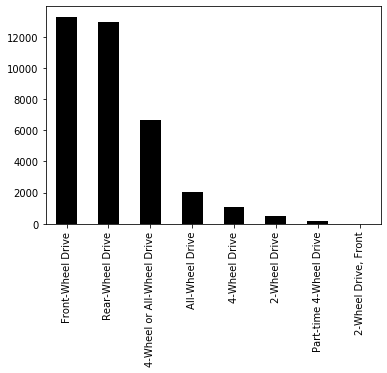

In [48]:

# Realizar um gráfico de barras
data['drive'].value_counts().plot(kind='bar', color = 'black')




<p>Para fazer um scatterplot devemos realizar a seguinte ação em um pd.DataFrame.plot(x = var1, y = var2, kind = 'scatter)</p>


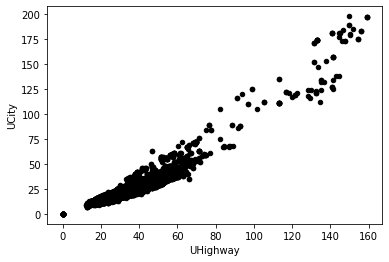

In [49]:

data[['UHighway','UCity']].plot(x ='UHighway',  y = 'UCity',   kind='scatter', color = 'black')



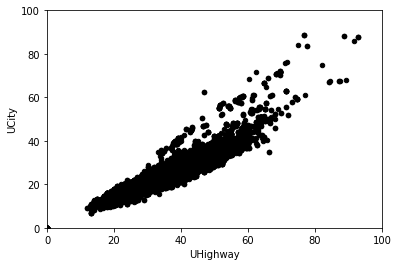

In [50]:
data[['UHighway','UCity']].plot(x ='UHighway'
                                             ,  y = 'UCity'
                                             ,   kind='scatter'
                                             , color = 'black'
                                            ,xlim = [0,100]
                                            ,ylim = [0,100])




<p><b>FONTES:</b></p>
<p>1 - <a href="http://pandas.pydata.org/">http://pandas.pydata.org/</a> <br/>
2 - <a href="http://pandas.pydata.org/pandas-docs/stable/">http://pandas.pydata.org/pandas-docs/stable/</a><br/>
3 - <a href="http://pandas.pydata.org/pandas-docs/stable/10min.html#min">http://pandas.pydata.org/pandas-docs/stable/10min.html#min</a><br/>
4 - <a href="http://pandas.pydata.org/pandas-docs/stable/api.html#general-functions">http://pandas.pydata.org/pandas-docs/stable/api.html#general-functions</a><br/></p>
